In [1]:
!pip install yfinance

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Setting up configurations
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('ggplot')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=317865 sha256=bf1145943a5b6f1e265d31805a9974a5f6a8905b1790bfd678031dba5f759eb0
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
# Importing datasets
xom_data = pd.read_csv('/kaggle/input/energy-crisis-and-stock-price-dataset-2021-2024/XOM_data.csv')
shel_data = pd.read_csv('/kaggle/input/energy-crisis-and-stock-price-dataset-2021-2024/SHEL_data.csv')
bp_data = pd.read_csv('/kaggle/input/energy-crisis-and-stock-price-dataset-2021-2024/BP_data.csv')

In [3]:
# Converting Date column to datetime format
xom_data['Date'] = pd.to_datetime(xom_data['Date'])
shel_data['Date'] = pd.to_datetime(shel_data['Date'])
bp_data['Date'] = pd.to_datetime(bp_data['Date'])

In [4]:
# Setting Date as index for easier plotting
xom_data.set_index('Date', inplace=True)
shel_data.set_index('Date', inplace=True)
bp_data.set_index('Date', inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
# Displaying the first few rows of each dataset
print("ExxonMobil (XOM) Data Head:")
print(xom_data.head())
print("\nShell (SHEL) Data Head:")
print(shel_data.head())
print("\nBP (BP) Data Head:")
print(bp_data.head())

ExxonMobil (XOM) Data Head:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  41.450001  42.250000  41.000000  41.500000  35.163219  27764700
2021-01-05  41.840000  44.799999  41.830002  43.500000  36.857830  44035100
2021-01-06  44.410000  45.099998  43.700001  44.610001  37.798344  36484800
2021-01-07  45.000000  45.570000  44.529999  44.959999  38.094898  29528100
2021-01-08  45.200001  45.820000  44.950001  45.459999  38.518559  28628200

Shell (SHEL) Data Head:
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-01-04  36.250000  36.360001  35.494999  36.029999  31.140999  6794599
2021-01-05  37.189999  39.014999  37.115002  38.509998  33.284489  8518589
2021-01-06  39.910000  40.680000  39.564999  40.290001  34.822952  9180332
2021-01-07  40.000000  40.625000  39.744

In [6]:
# Summary statistics for each dataset
print("\nExxonMobil (XOM) Summary Statistics:")
print(xom_data.describe())
print("\nShell (SHEL) Summary Statistics:")
print(shel_data.describe())
print("\nBP (BP) Summary Statistics:")
print(bp_data.describe())


ExxonMobil (XOM) Summary Statistics:
             Open        High         Low       Close   Adj Close  \
count  977.000000  977.000000  977.000000  977.000000  977.000000   
mean    92.278618   93.319642   91.301505   92.336315   86.770530   
std     23.157683   23.293578   22.973333   23.136443   24.600429   
min     41.450001   42.250000   41.000000   41.500000   35.163219   
25%     64.610001   65.330002   64.180000   64.519997   57.733021   
50%    102.000000  103.089996  100.910004  102.059998   97.441528   
75%    111.639999  113.089996  110.610001  111.610001  106.250908   
max    125.250000  126.339996  124.860001  125.370003  124.348221   

             Volume  
count  9.770000e+02  
mean   2.090369e+07  
std    8.748485e+06  
min    7.136000e+06  
25%    1.487760e+07  
50%    1.875670e+07  
75%    2.441240e+07  
max    8.443940e+07  

Shell (SHEL) Summary Statistics:
             Open        High         Low       Close   Adj Close  \
count  977.000000  977.000000  977.0000

In [7]:
# Checking for missing values in each dataset
print("\nMissing Values in ExxonMobil (XOM):")
print(xom_data.isnull().sum())
print("\nMissing Values in Shell (SHEL):")
print(shel_data.isnull().sum())
print("\nMissing Values in BP (BP):")
print(bp_data.isnull().sum())


Missing Values in ExxonMobil (XOM):
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing Values in Shell (SHEL):
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing Values in BP (BP):
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


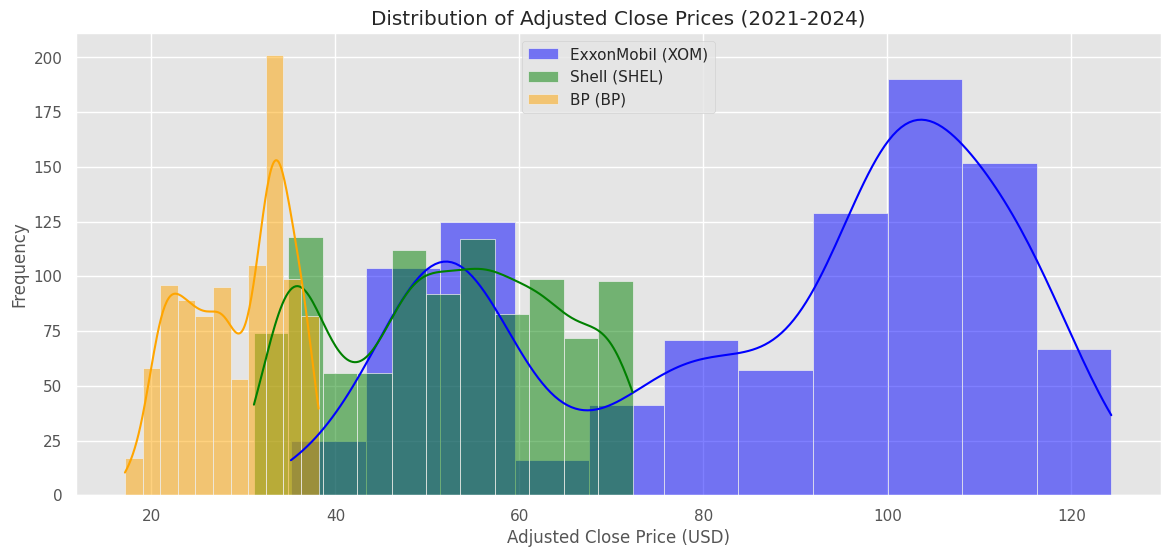

In [8]:
# Visualizing the distribution of Adjusted Close prices for each company
plt.figure(figsize=(14, 6))
sns.histplot(xom_data['Adj Close'], kde=True, color='blue', label='ExxonMobil (XOM)')
sns.histplot(shel_data['Adj Close'], kde=True, color='green', label='Shell (SHEL)')
sns.histplot(bp_data['Adj Close'], kde=True, color='orange', label='BP (BP)')
plt.title('Distribution of Adjusted Close Prices (2021-2024)')
plt.xlabel('Adjusted Close Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

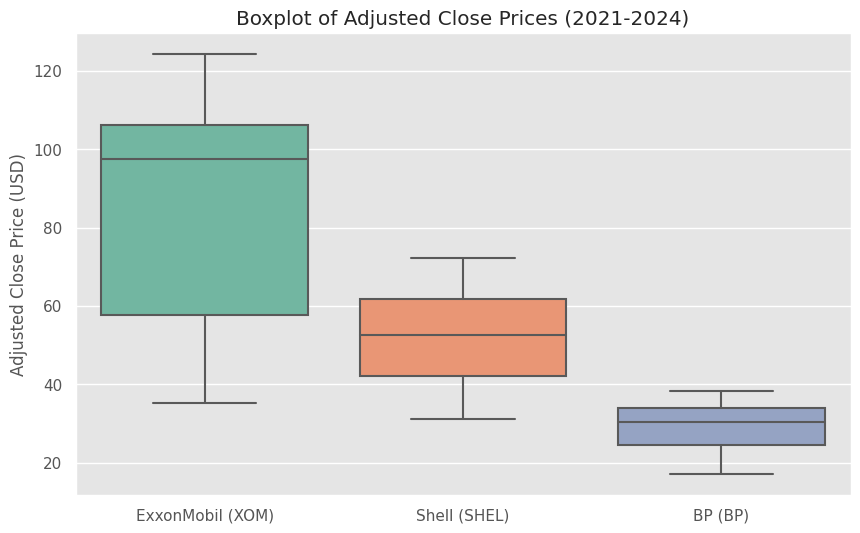

In [9]:
# Boxplot for comparison of Adjusted Close prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=[xom_data['Adj Close'], shel_data['Adj Close'], bp_data['Adj Close']], palette='Set2')
plt.xticks([0, 1, 2], ['ExxonMobil (XOM)', 'Shell (SHEL)', 'BP (BP)'])
plt.title('Boxplot of Adjusted Close Prices (2021-2024)')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()

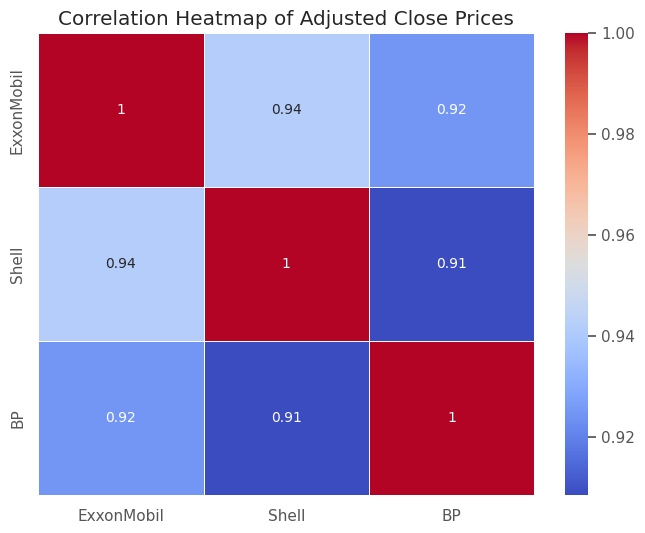

In [10]:
# Correlation Heatmap
combined_data = pd.concat([xom_data['Adj Close'], shel_data['Adj Close'], bp_data['Adj Close']], axis=1)
combined_data.columns = ['ExxonMobil', 'Shell', 'BP']

plt.figure(figsize=(8, 6))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Adjusted Close Prices')
plt.show()

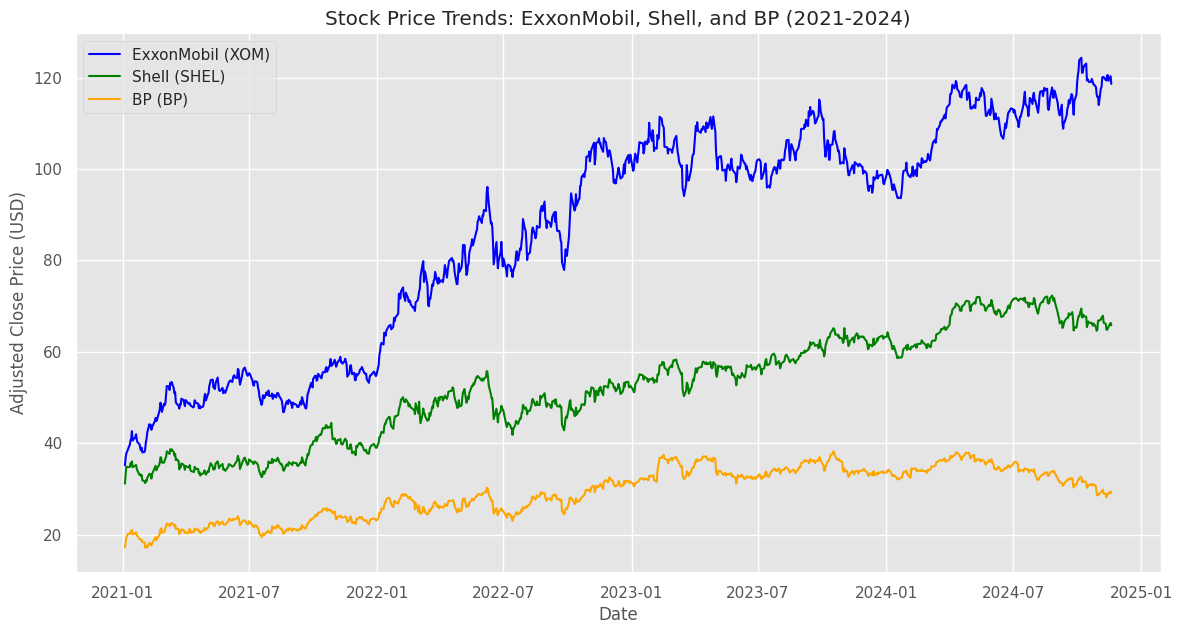

In [11]:
# Time series plot to visualize trends over time
plt.figure(figsize=(14, 7))
plt.plot(xom_data.index, xom_data['Adj Close'], label='ExxonMobil (XOM)', color='blue')
plt.plot(shel_data.index, shel_data['Adj Close'], label='Shell (SHEL)', color='green')
plt.plot(bp_data.index, bp_data['Adj Close'], label='BP (BP)', color='orange')

plt.title('Stock Price Trends: ExxonMobil, Shell, and BP (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Time Series Analysis - Moving Averages

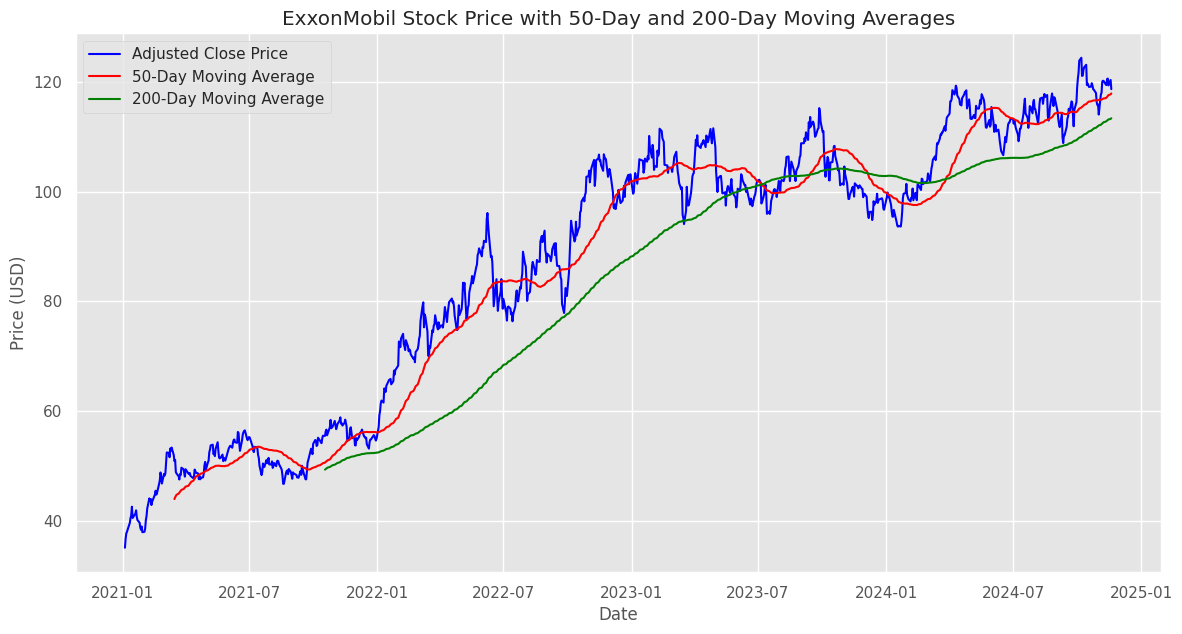

In [12]:
# Calculating 50-day and 200-day moving averages for ExxonMobil
xom_data['MA50'] = xom_data['Adj Close'].rolling(window=50).mean()
xom_data['MA200'] = xom_data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(xom_data.index, xom_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(xom_data.index, xom_data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(xom_data.index, xom_data['MA200'], label='200-Day Moving Average', color='green')

plt.title('ExxonMobil Stock Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

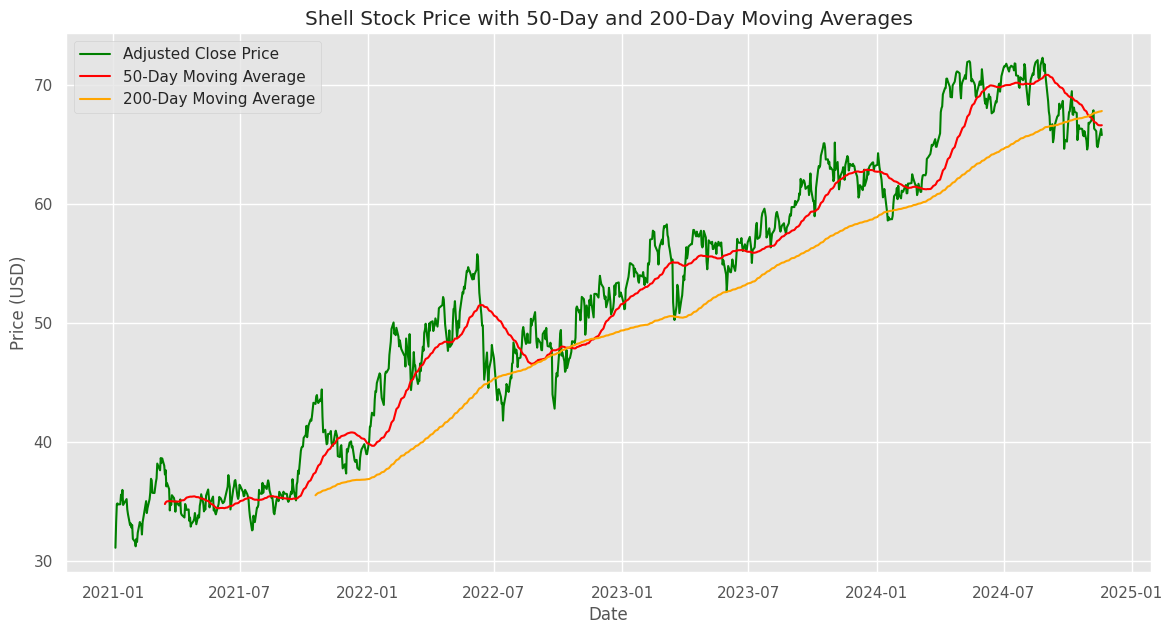

In [13]:
# Seasonal Decomposition using Moving Averages for Shell
shel_data['MA50'] = shel_data['Adj Close'].rolling(window=50).mean()
shel_data['MA200'] = shel_data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(shel_data.index, shel_data['Adj Close'], label='Adjusted Close Price', color='green')
plt.plot(shel_data.index, shel_data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(shel_data.index, shel_data['MA200'], label='200-Day Moving Average', color='orange')

plt.title('Shell Stock Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

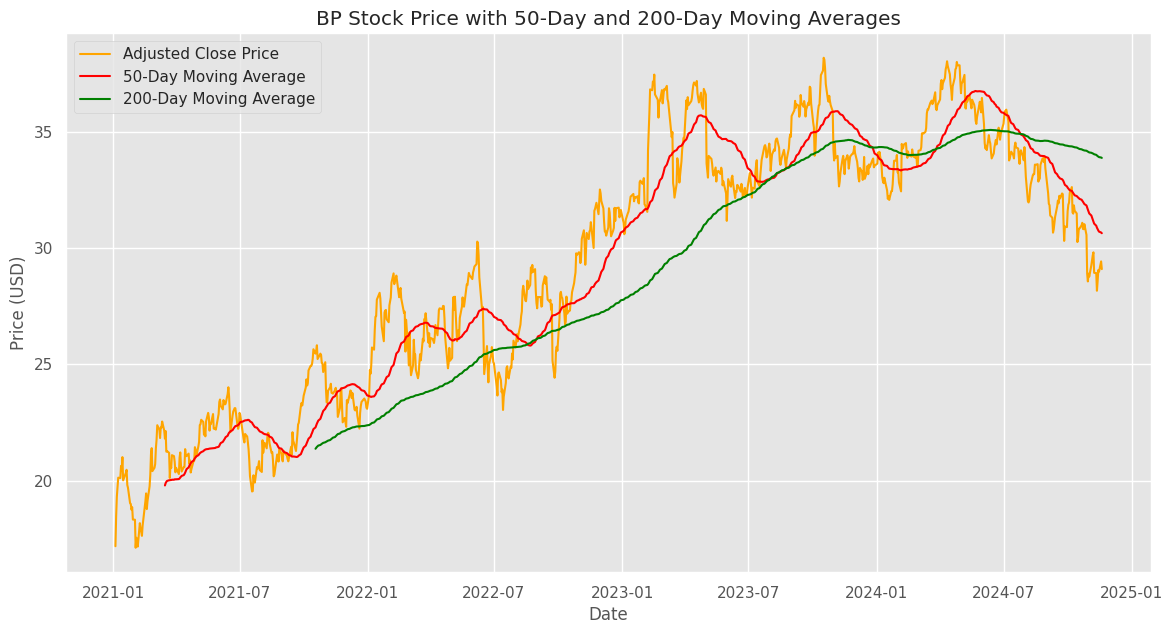

In [14]:
# BP Stock Price Analysis with Moving Averages
bp_data['MA50'] = bp_data['Adj Close'].rolling(window=50).mean()
bp_data['MA200'] = bp_data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(bp_data.index, bp_data['Adj Close'], label='Adjusted Close Price', color='orange')
plt.plot(bp_data.index, bp_data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(bp_data.index, bp_data['MA200'], label='200-Day Moving Average', color='green')

plt.title('BP Stock Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

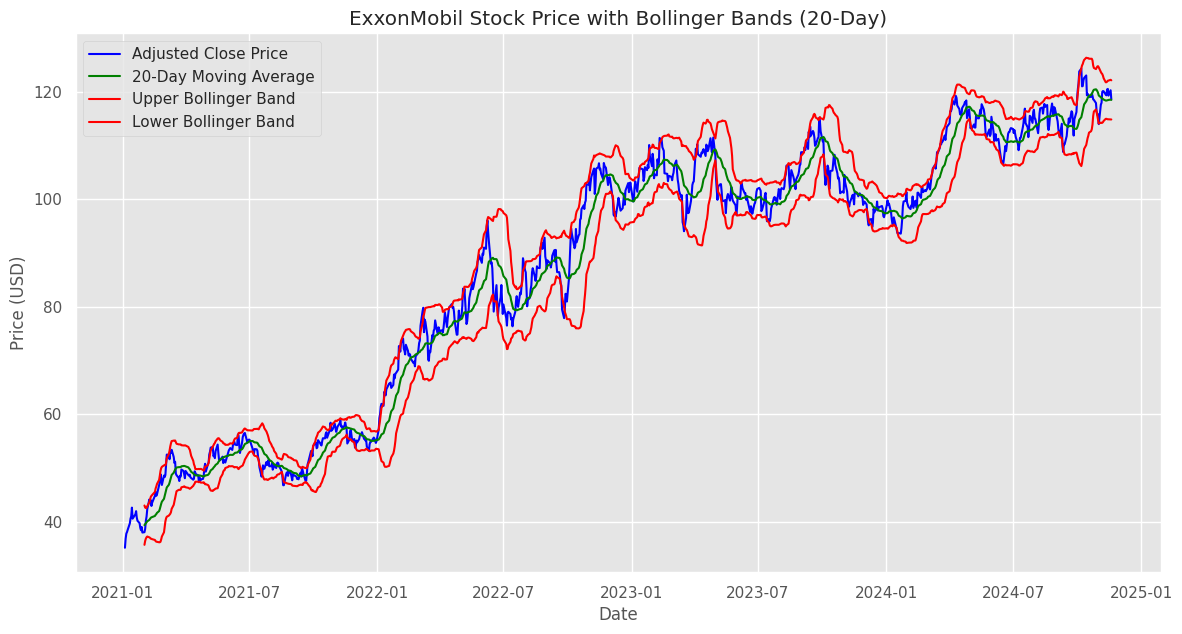

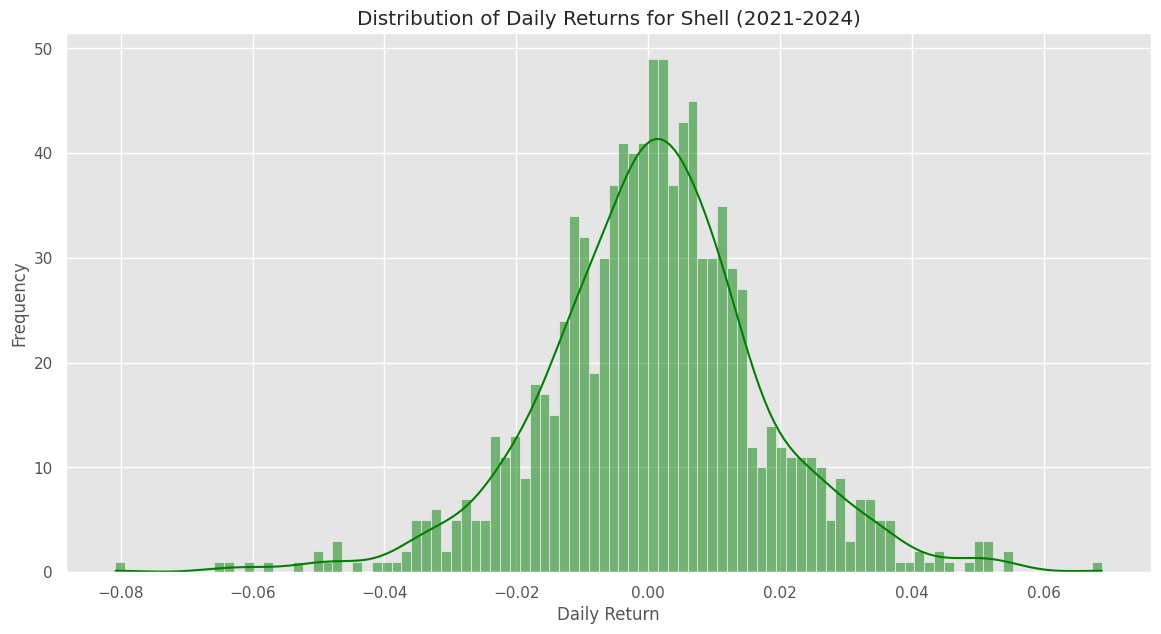

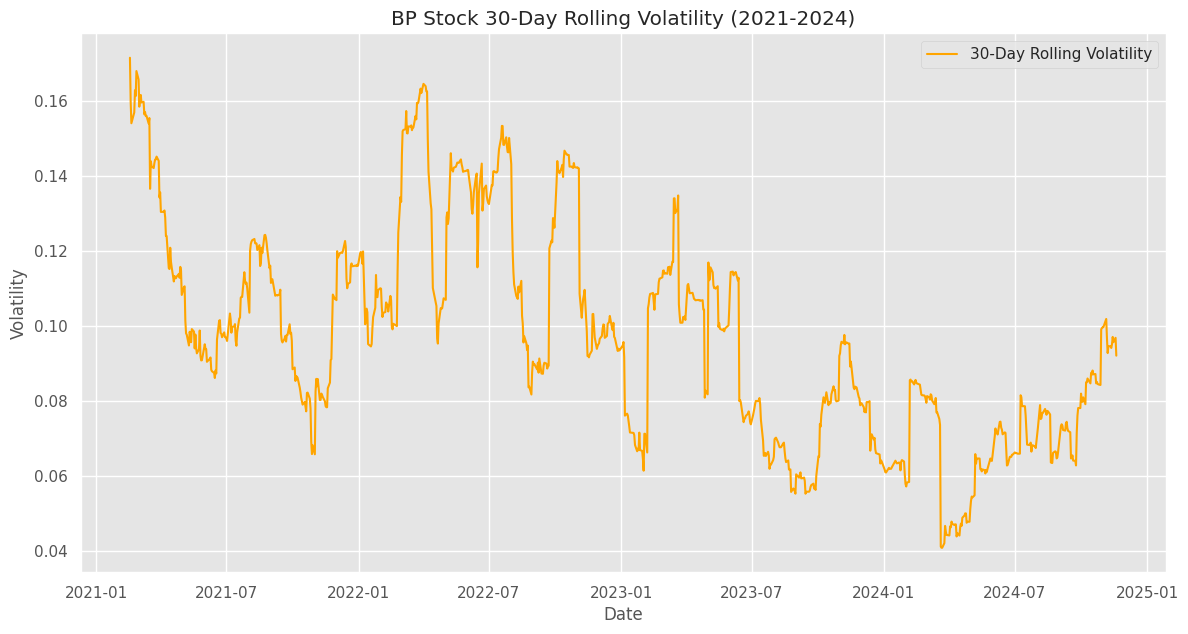

In [15]:
# Bollinger Bands for ExxonMobil
xom_data['MA20'] = xom_data['Adj Close'].rolling(window=20).mean()
xom_data['BB_upper'] = xom_data['MA20'] + (xom_data['Adj Close'].rolling(window=20).std() * 2)
xom_data['BB_lower'] = xom_data['MA20'] - (xom_data['Adj Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14, 7))
plt.plot(xom_data.index, xom_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(xom_data.index, xom_data['MA20'], label='20-Day Moving Average', color='green')
plt.plot(xom_data.index, xom_data['BB_upper'], label='Upper Bollinger Band', color='red')
plt.plot(xom_data.index, xom_data['BB_lower'], label='Lower Bollinger Band', color='red')

plt.title('ExxonMobil Stock Price with Bollinger Bands (20-Day)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Daily Returns Calculation for Shell
shel_data['Daily_Return'] = shel_data['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.histplot(shel_data['Daily_Return'].dropna(), bins=100, color='green', kde=True)
plt.title('Distribution of Daily Returns for Shell (2021-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Volatility Analysis for BP
bp_data['Daily_Return'] = bp_data['Adj Close'].pct_change()
bp_volatility = bp_data['Daily_Return'].rolling(window=30).std() * np.sqrt(30)

plt.figure(figsize=(14, 7))
plt.plot(bp_data.index, bp_volatility, label='30-Day Rolling Volatility', color='orange')
plt.title('BP Stock 30-Day Rolling Volatility (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

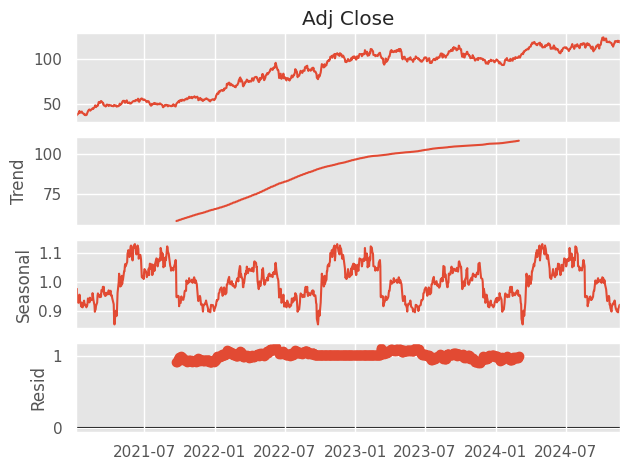

In [16]:
# Seasonal Decomposition for ExxonMobil
result = seasonal_decompose(xom_data['Adj Close'], model='multiplicative', period=365)
result.plot()
plt.show()

Augmented Dickey-Fuller Test: ExxonMobil (XOM) Adjusted Close Price
ADF Test Statistic              -1.556939
p-value                          0.505180
#Lags Used                       2.000000
Number of Observations Used    974.000000
Critical Value (1%)             -3.437082
Critical Value (5%)             -2.864512
Critical Value (10%)            -2.568352

Fail to reject the null hypothesis - Time series is not stationary

Augmented Dickey-Fuller Test: ExxonMobil (XOM) Adjusted Close Price Differenced
ADF Test Statistic             -23.079977
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    974.000000
Critical Value (1%)             -3.437082
Critical Value (5%)             -2.864512
Critical Value (10%)            -2.568352

Reject the null hypothesis - Time series is stationary



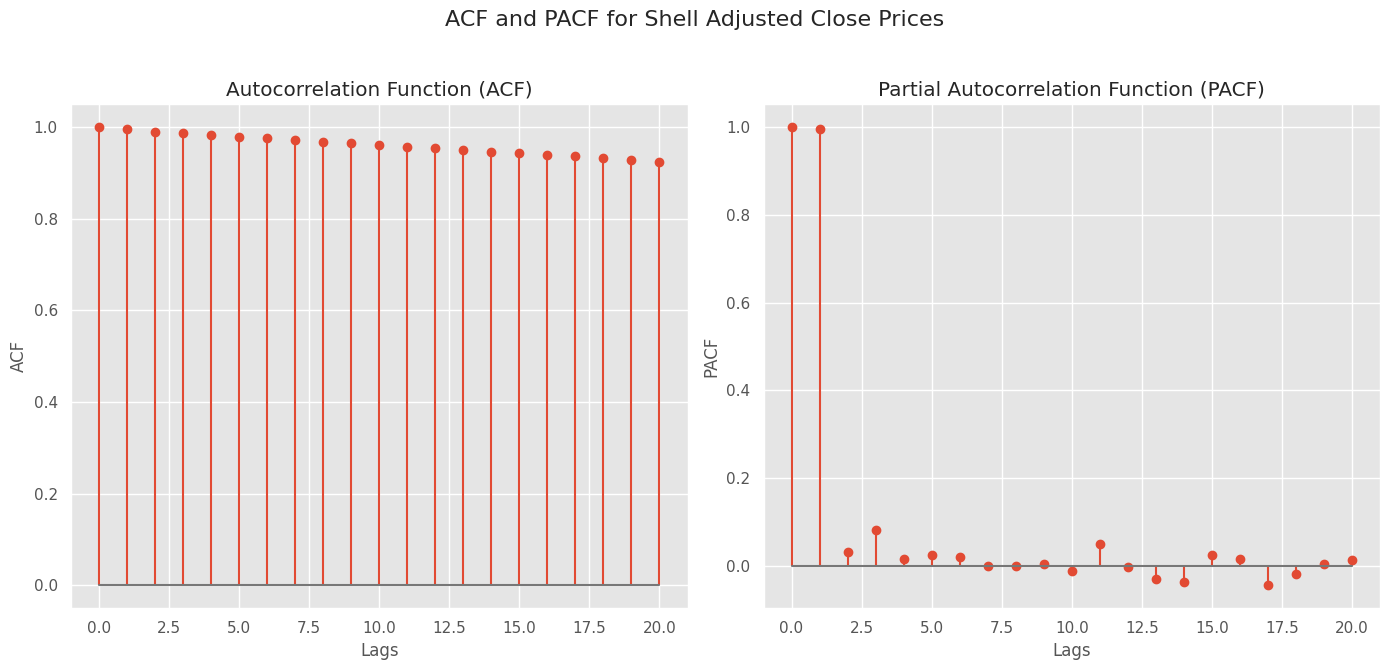

In [17]:
# ADF Test for Stationarity
def adf_test(series, title=''): 
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("\nReject the null hypothesis - Time series is stationary\n")
    else:
        print("\nFail to reject the null hypothesis - Time series is not stationary\n")

# Applying ADF Test to ExxonMobil Adjusted Close Prices
adf_test(xom_data['Adj Close'], 'ExxonMobil (XOM) Adjusted Close Price')

# Differencing to make the series stationary
xom_data['Adj Close Diff'] = xom_data['Adj Close'].diff().dropna()

# Reapplying ADF Test to the differenced series
adf_test(xom_data['Adj Close Diff'], 'ExxonMobil (XOM) Adjusted Close Price Differenced')

# ACF and PACF Plots for Shell using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('ACF and PACF for Shell Adjusted Close Prices', fontsize=16)

# ACF Plot
axes[0].stem(acf(shel_data['Adj Close'].dropna(), nlags=20))
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

# PACF Plot
axes[1].stem(pacf(shel_data['Adj Close'].dropna(), nlags=20))
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

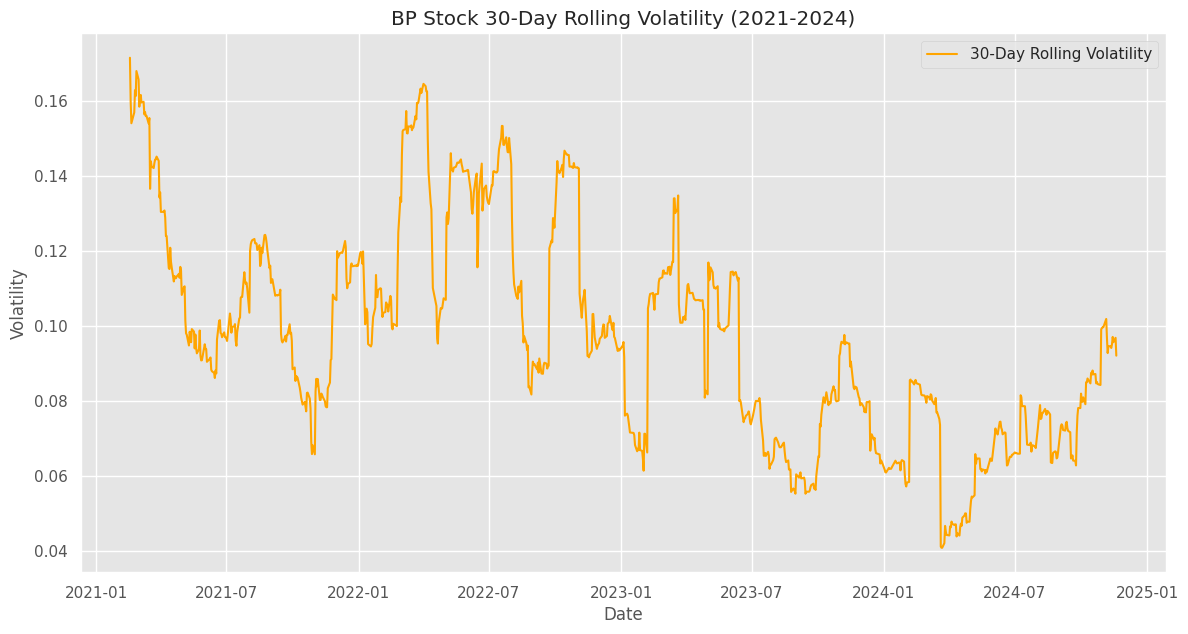

In [18]:
# Volatility Clustering Analysis for BP
bp_data['Daily_Return'] = bp_data['Adj Close'].pct_change()
bp_volatility = bp_data['Daily_Return'].rolling(window=30).std() * np.sqrt(30)

plt.figure(figsize=(14, 7))
plt.plot(bp_data.index, bp_volatility, label='30-Day Rolling Volatility', color='orange')
plt.title('BP Stock 30-Day Rolling Volatility (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# ARIMA Model for BP Stock Price Forecasting
from statsmodels.tsa.arima.model import ARIMA

In [20]:
# Fit ARIMA model (order can be adjusted based on data analysis)
model = ARIMA(bp_data['Adj Close'], order=(5, 1, 0))
model_fit = model.fit()

In [21]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  977
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -732.312
Date:                Wed, 20 Nov 2024   AIC                           1476.624
Time:                        15:47:17   BIC                           1505.925
Sample:                             0   HQIC                          1487.773
                                - 977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0358      0.030      1.187      0.235      -0.023       0.095
ar.L2         -0.0383      0.029     -1.312      0.190      -0.095       0.019
ar.L3         -0.0231      0.028     -0.831      0.4

In [22]:
# Forecast future values
forecast = model_fit.forecast(steps=30)

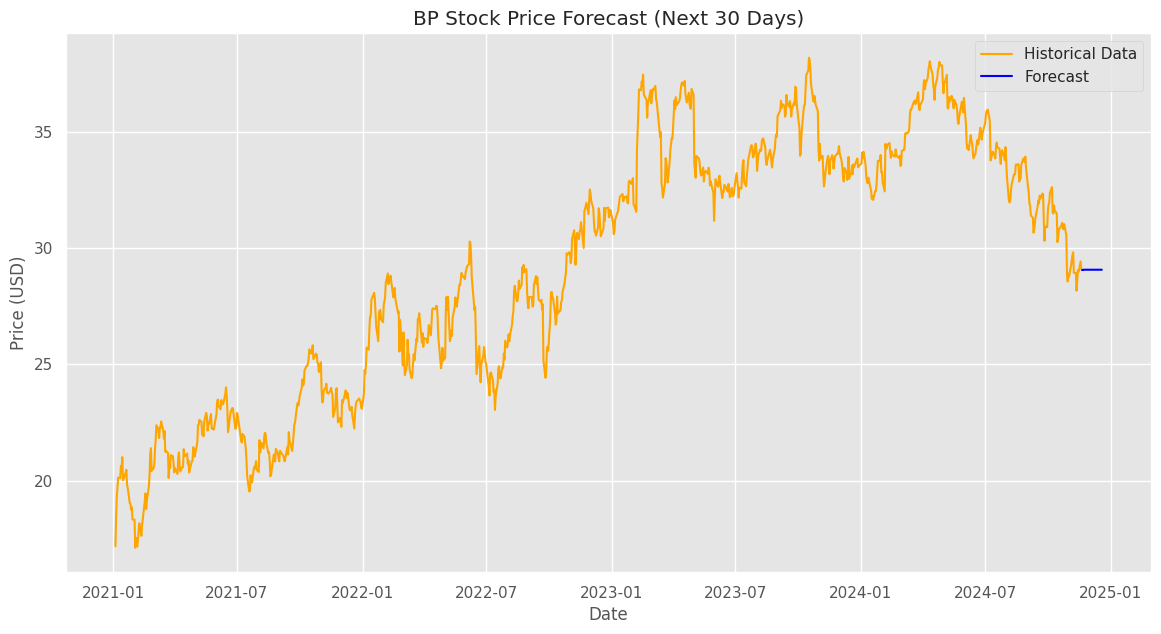

In [23]:
# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(bp_data.index, bp_data['Adj Close'], label='Historical Data', color='orange')
plt.plot(pd.date_range(bp_data.index[-1] + pd.Timedelta(days=1), periods=30), forecast, label='Forecast', color='blue')
plt.title('BP Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Daily Return Distribution and Sharpe Ratio for BP

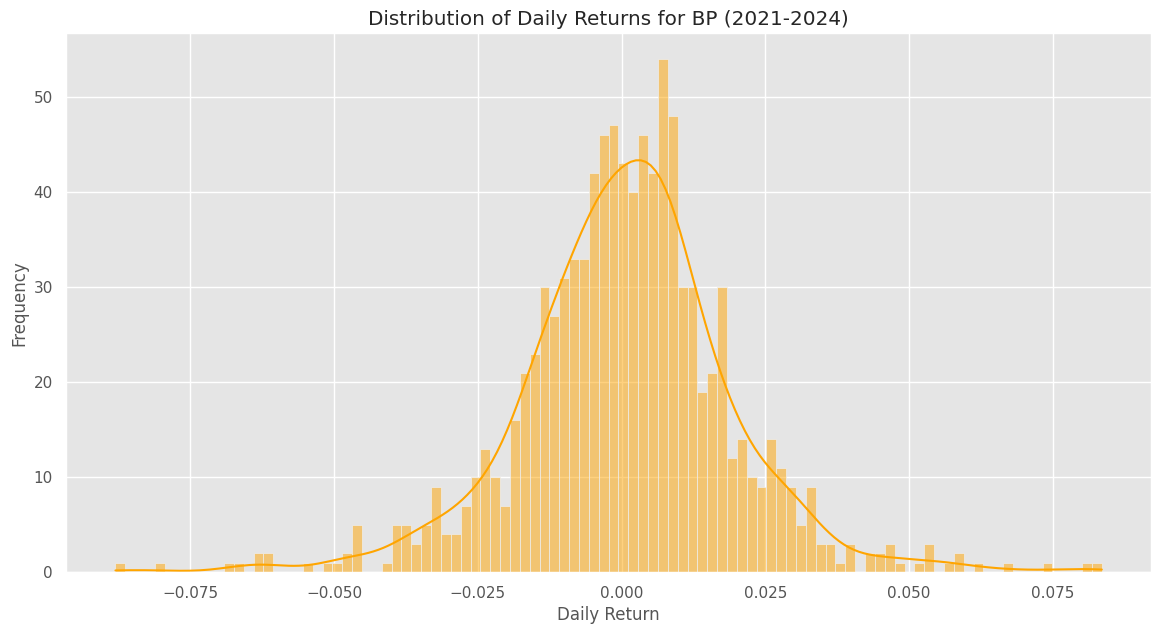

Sharpe Ratio for BP: 0.61


In [24]:
# Plotting the distribution of daily returns
plt.figure(figsize=(14, 7))
sns.histplot(bp_data['Daily_Return'].dropna(), bins=100, color='orange', kde=True)
plt.title('Distribution of Daily Returns for BP (2021-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculating the Sharpe Ratio
mean_daily_return = bp_data['Daily_Return'].mean()
std_daily_return = bp_data['Daily_Return'].std()
sharpe_ratio = mean_daily_return / std_daily_return * np.sqrt(252)  # Annualizing the Sharpe Ratio

print(f"Sharpe Ratio for BP: {sharpe_ratio:.2f}")

Value at Risk (95% confidence level) for BP: -3.00%


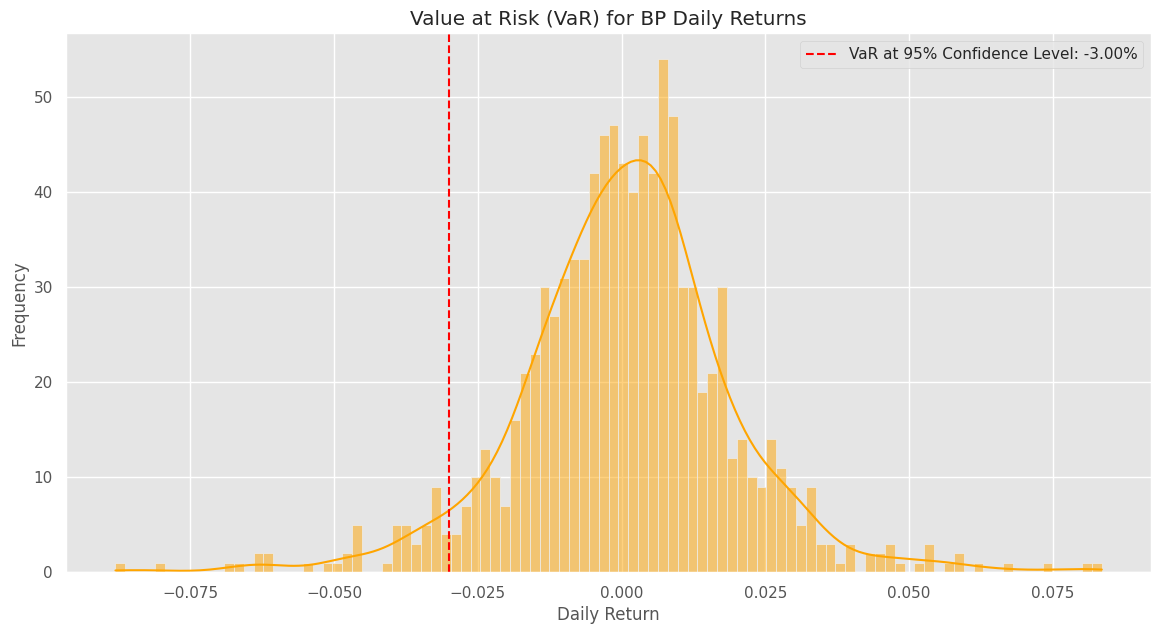

In [25]:
# Value at Risk (VaR) Calculation for BP
confidence_level = 0.95
var_95 = np.percentile(bp_data['Daily_Return'].dropna(), (1 - confidence_level) * 100)

print(f"Value at Risk (95% confidence level) for BP: {var_95:.2%}")

# Plotting VaR on the Daily Return Distribution
plt.figure(figsize=(14, 7))
sns.histplot(bp_data['Daily_Return'].dropna(), bins=100, color='orange', kde=True)
plt.axvline(x=var_95, color='red', linestyle='--', label=f'VaR at 95% Confidence Level: {var_95:.2%}')
plt.title('Value at Risk (VaR) for BP Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

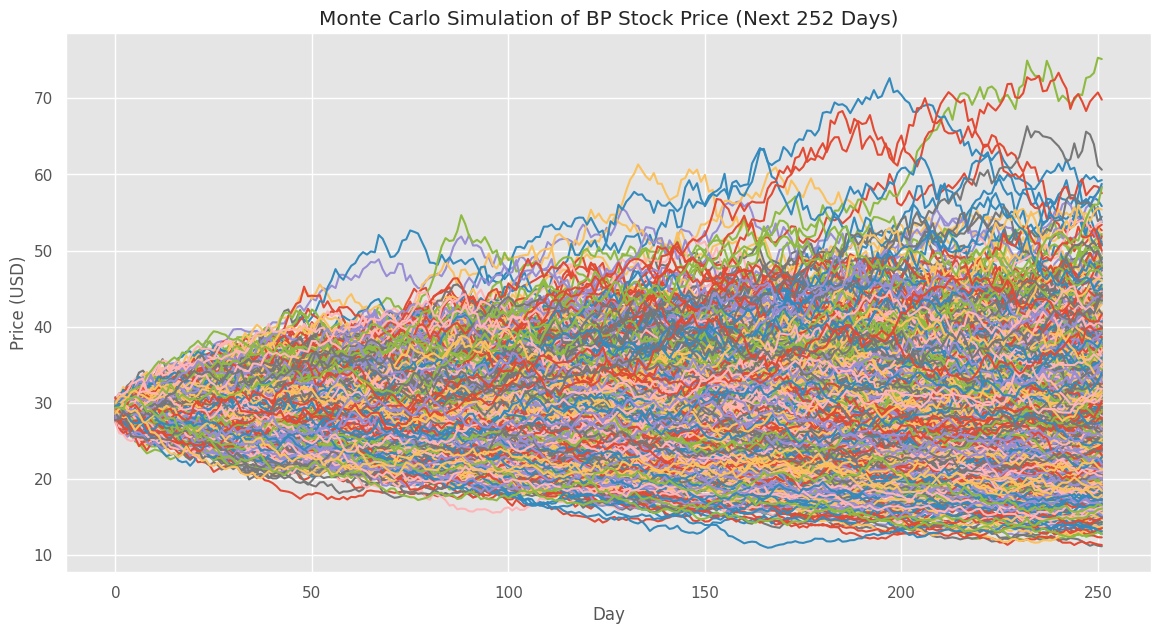

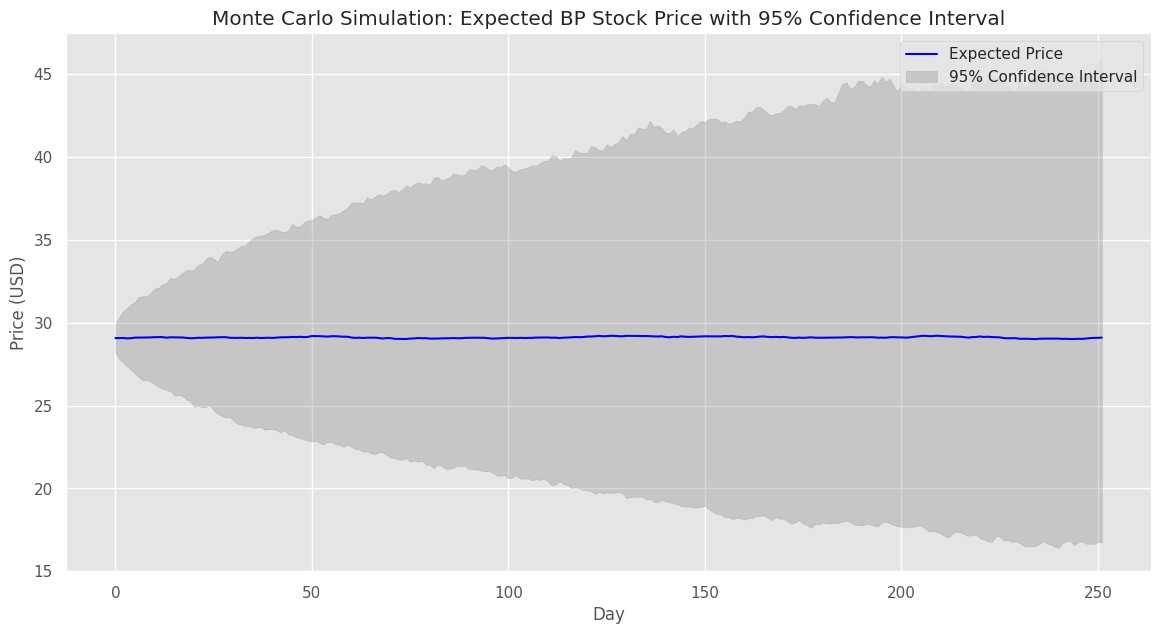

In [26]:
# Monte Carlo Simulation for BP Stock Price
num_simulations = 1000
num_days = 252
last_price = bp_data['Adj Close'].iloc[-1]

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    daily_volatility = bp_data['Daily_Return'].std()
    price_series = []
    price = last_price
    for _ in range(num_days):
        price = price * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
    simulation_df[x] = price_series

# Plotting the Monte Carlo Simulation Results
plt.figure(figsize=(14, 7))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of BP Stock Price (Next 252 Days)')
plt.xlabel('Day')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Calculating the expected price and the confidence interval
expected_price = simulation_df.mean(axis=1)
ci_lower = simulation_df.quantile(0.05, axis=1)
ci_upper = simulation_df.quantile(0.95, axis=1)

# Plotting the expected price with confidence interval
plt.figure(figsize=(14, 7))
plt.plot(expected_price, label='Expected Price', color='blue')
plt.fill_between(range(num_days), ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('Monte Carlo Simulation: Expected BP Stock Price with 95% Confidence Interval')
plt.xlabel('Day')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Risk-Return Analysis for BP - Professional Version

Risk-Return Analysis for BP Stock:

Expected Annual Return: 0.18%
Annual Risk (Volatility): 0.30%
Sharpe Ratio: 0.57



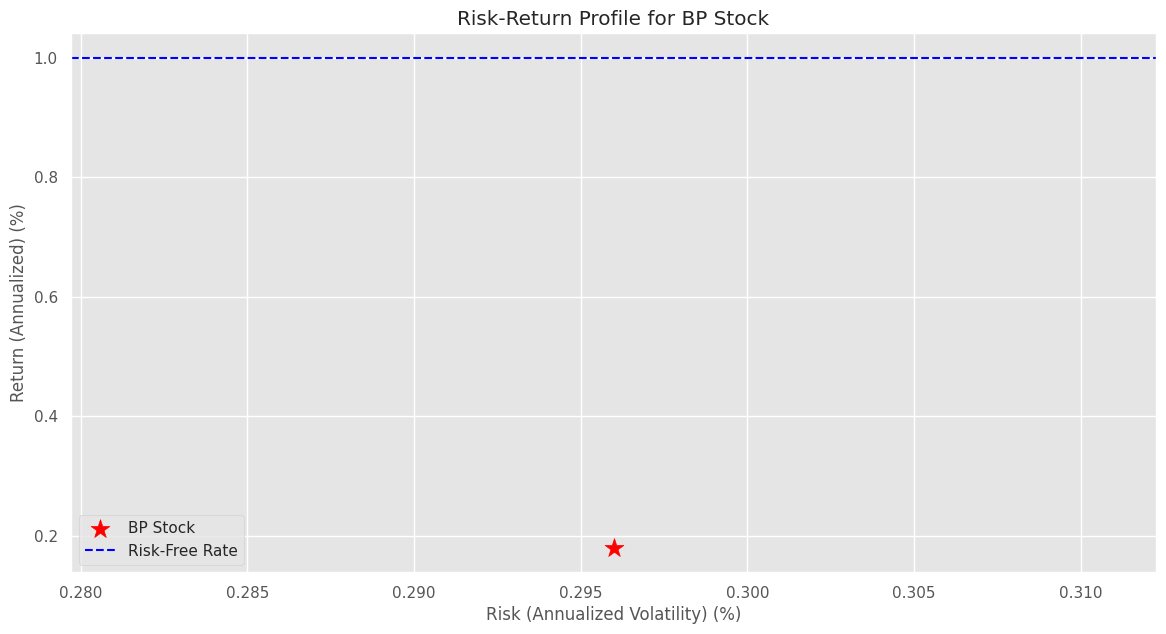


Professional Commentary:
The analysis above presents the expected annual return, annual risk (volatility), and Sharpe Ratio for BP stock.
The Sharpe Ratio provides a measure of risk-adjusted return, helping investors evaluate whether the risk taken is adequately compensated by the expected return.
The blue dashed line represents the risk-free rate, which is used as a benchmark to assess the attractiveness of BP stock in comparison to risk-free investments.


In [ ]:
# Calculating the expected annual return and annual risk (volatility)
mean_return_bp = bp_data['Daily_Return'].mean() * 252
volatility_bp = bp_data['Daily_Return'].std() * np.sqrt(252)
risk_free_rate = 0.01  # Assuming a risk-free rate of 1%

# Calculating the Sharpe Ratio
sharpe_ratio_bp = (mean_return_bp - risk_free_rate) / volatility_bp

# Displaying the risk-return analysis results
print("Risk-Return Analysis for BP Stock:\n")
print(f"Expected Annual Return: {mean_return_bp:.2f}%")
print(f"Annual Risk (Volatility): {volatility_bp:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_bp:.2f}\n")

# Visualizing Risk-Return Profile
plt.figure(figsize=(14, 7))
plt.scatter(volatility_bp, mean_return_bp, c='red', marker='*', s=200, label='BP Stock')
plt.axhline(y=risk_free_rate * 100, color='blue', linestyle='--', linewidth=1.5, label='Risk-Free Rate')
plt.title('Risk-Return Profile for BP Stock')
plt.xlabel('Risk (Annualized Volatility) (%)')
plt.ylabel('Return (Annualized) (%)')
plt.legend()
plt.grid(True)
plt.show()

# Professional Commentary
print("\nProfessional Commentary:")
print("The analysis above presents the expected annual return, annual risk (volatility), and Sharpe Ratio for BP stock.")
print("The Sharpe Ratio provides a measure of risk-adjusted return, helping investors evaluate whether the risk taken is adequately compensated by the expected return.")
print("The blue dashed line represents the risk-free rate, which is used as a benchmark to assess the attractiveness of BP stock in comparison to risk-free investments.")